In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt


## Saving as a scenario

In [2]:
!ls ../mat/*

../mat/line_fresnelastique.npy ../mat/line_vague_solo.npy
../mat/line_vague_dense.npy    ../mat/master.npy


In [3]:
%%writefile ../scenario_line_master.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

import elasticite as el
import numpy as np
import os

def master(e, filename):
    if e.structure: N_lame = e.N_lame-e.struct_N
    else: N_lame = e.N_lame

    def montage(z, z_in):
        print (z_in[0, 0], z[-1, 0], z_in[0, 0], z_in[-1, 0])
        z_in[:, 0] += z[-1, 0] + 1./e.desired_fps # increment the time on the new array
        print (z.shape, z_in.shape, z_in[0, 0], z_in[-1, 0])
        return np.vstack((z, z_in))

    
    matpath = 'mat/'
    z_s = {}
    for scenario in ['line_vague_dense', 'line_vague_solo', 'line_fresnelastique']:
        z_s[scenario] = np.load(os.path.join(matpath, scenario + '.npy'))
    
    ###########################################################################
    burnout_time = 4.
    z = np.zeros((1, N_lame+1)) # zero at zero
    z = np.vstack((z, np.hstack((np.array(burnout_time), np.zeros(N_lame) ))))
    ###########################################################################
    z = montage(z, z_s['line_vague_dense'])
    ###########################################################################
    z = montage(z, z_s['line_vague_solo'])
    ###########################################################################
    z = montage(z, z_s['line_fresnelastique'])
    ###########################################################################
    z = montage(z, z_s['line_vague_dense'])
    
    ###########################################################################
    # save the file
    np.save(filename, z)

        

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'
        
    filename='mat/master.npy'
    
    e = el.EdgeGrid(N_lame=25, grid_type='line', mode=mode,
                 verb=True, filename=filename)

    if mode == 'writer':
        master(e, filename)
    else:
        # running the code
        el.main(e)


Overwriting ../scenario_line_master.py


In [4]:
%cd ..
%run  scenario_line_master.py writer
%cd posts

/Users/laurentperrinet/pool/Dropbox/py-elasticite
0.0 4.0 0.0 19.8333333333
(2, 26) (596, 26) 4.03333333333 23.8666666667
0.0 23.8666666667 0.0 19.8666666667
(598, 26) (597, 26) 23.9 43.7666666667
0.0 43.7666666667 0.0 29.9666666667
(1195, 26) (900, 26) 43.8 73.7666666667
4.03333333333 73.7666666667 4.03333333333 23.8666666667
(2095, 26) (596, 26) 77.8333333333 97.6666666667
/Users/laurentperrinet/pool/Dropbox/py-elasticite/posts


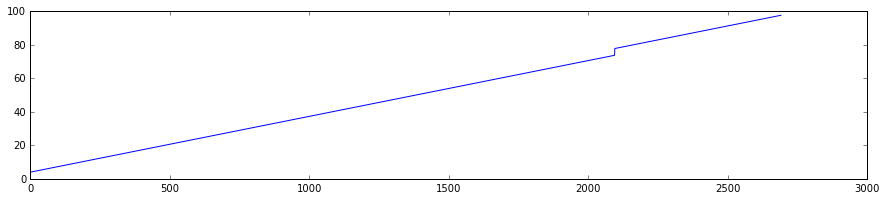

In [5]:
z = np.load('../mat/master.npy')
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(z[:, 0])

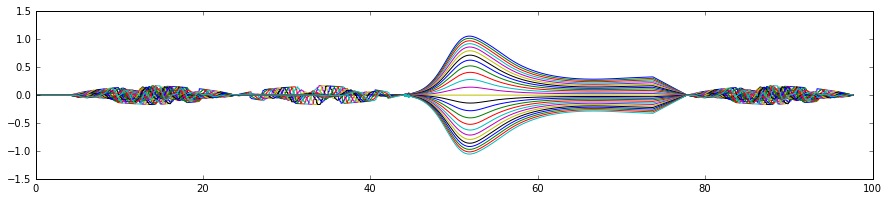

In [6]:
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(z[:, 0], z[:, 1:])

## git


In [10]:
#! git add 2015-11-26*
!git s

?? ../.gitignore_conflict-20151125-105937
?? "2015-11-02 \303\251lasticit\303\251 expansion en miroir - exploration param\303\250tres_conflict-20151125-105824.ipynb"
?? "2015-11-02 \303\251lasticit\303\251 expansion en miroir - principes_conflict-20151123-174335.ipynb"
?? "2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal2.ipynb"
?? "2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal_conflict-20151123-174338.ipynb"
?? ../scenario_line_contraint_conflict-20151123-173454.py
?? ../scenario_line_fresnel_conflict-20151123-162407.py
?? ../screenshot_conflict-20151123-173642.png
?? ../src/elasticite_conflict-20151123-173759.py


In [8]:
!git commit -am' scenario master '

On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
	../.gitignore_conflict-20151125-105937
	"2015-11-02 \303\251lasticit\303\251 expansion en miroir - exploration param\303\250tres_conflict-20151125-105824.ipynb"
	"2015-11-02 \303\251lasticit\303\251 expansion en miroir - principes_conflict-20151123-174335.ipynb"
	"2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal2.ipynb"
	"2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal_conflict-20151123-174338.ipynb"
	../scenario_line_contraint_conflict-20151123-173454.py
	../scenario_line_fresnel_conflict-20151123-162407.py
	../screenshot_conflict-20151123-173642.png
	../src/elasticite_conflict-20151123-173759.py

nothing added to commit but untracked files present


In [9]:
! git push

Everything up-to-date
